Data Date Range:
    <br />Start time: 2016-05-05 09:40:26
    <br />End time: 2018-01-17 01:59:42
    
#### This notebook does the following analysis:

- Percentages of trailer liked among all trailers that are played played, grouped by algorithms
- Percentages of trailer liked among recommended trailers that are played, grouped by algorithms

### Percentages of recommendations liked among recommendations that are clicked, by each algorithm. ###


In [3]:
import pandas as pd
import numpy as np

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load data:
rec_played_liked = pd.read_csv('../Clean_Data/rec_played_liked.csv', sep=',')
rec_played_liked.loc[rec_played_liked.recommenderId == 'ShuffledTopPicks', 'recommenderId'] = 'Baseline'


In [10]:
rec_played_liked_clean = rec_played_liked.drop(['Unnamed: 0'], axis=1)
mlusers = [32451,49002,49253,50540,51234,51714,65817,66644,68903,70023,70026,92721,92723,95195,96279,96483,96691,97397,104218,113699,114092,114844,122798,124450,124790,125283,125431,127628,127979,129299,130353,132131,132145,132637,132726,132728,132871,133047,134070,134088,134143,134235,134342,134349,134372,134373,134393,134484,134496,134498,134504,134533,135260,135670,136346,136505,136995,137096,137331,137372,138083,138089,138090,138108,141799,142115,143473,149815,151709,151982,166008,173637,176970,183038,183567,197881,202657,207221,221192,221515,225510,233659,233985,237287,237332,238576,238876,240312,242238,242683,243010,243445,245696,246018,246058,246587,246828,248583,251610,251922,252238,252534,253066,253866,253869,257628,257629,257756,258553,258554,258555,258556,258557,258558,258559,258560,258561,258562,258563,258564,258565,259056,260701,264178,266542,268253,269945,286014,287206,292397,301040,304542,313322,316070,317416,318334]
rec_played_liked_noml = rec_played_liked_clean[~rec_played_liked_clean.userId.isin(mlusers)]
rec_played_liked_clean.count()

userId           9142
loginId          9142
movieId          9142
action           9142
tstamp_x         9142
position         9142
sessionIds       9142
recommenderId    9142
isLiked           289
tstamp_y          289
dtype: int64

In [11]:
# How many trailers, among all trailers played, are liked and disliked, for each algorithm?
num_rec_likes = rec_played_liked_clean.groupby(['recommenderId','isLiked']).count().unstack()['movieId']['TrailerLiked']
num_rec_dislikes = rec_played_liked_clean.groupby(['recommenderId','isLiked']).count().unstack()['movieId']['TrailerDisliked']

# How many are played, for each algorithm assignment?
num_recs= rec_played_liked_clean.groupby('recommenderId').count()['movieId']

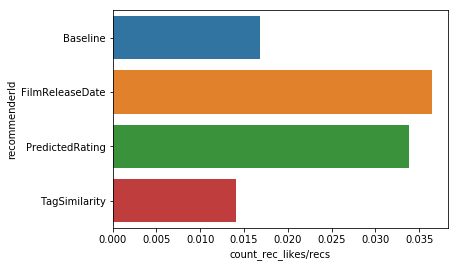

In [12]:
#Calculate the percentage:
percent_rec_likes = (num_rec_likes/num_recs).reset_index()
percent_rec_likes.rename(columns={0:'count_rec_likes/recs'},inplace=True)

#Visualize result:
ax = sns.barplot(x="count_rec_likes/recs", y="recommenderId", data=percent_rec_likes)
# ax.set_xlim(0,0.04)


In [13]:
# Percentages of recommended trailers disliked
num_rec_dislikes/num_recs

# It's interesting to see that TagSimilarity is the one disliked the least.
# This might suggest that people tend to respond to trailers recommended via 'TagSimilarity'.

recommenderId
Baseline           0.020453
FilmReleaseDate    0.004640
PredictedRating    0.003195
TagSimilarity      0.001079
dtype: float64

### Percentages of recommendations either liked or disliked among recommendations clicked, for each algorithm. ###


In [14]:
# How many trailers, among all trailers played, are either liked or disliked, for each algorithm?
num_rec_respond = rec_played_liked_clean.groupby('recommenderId').count()['isLiked'] 
num_rec_respond

recommenderId
Baseline            51
FilmReleaseDate    115
PredictedRating     81
TagSimilarity       42
Name: isLiked, dtype: int64

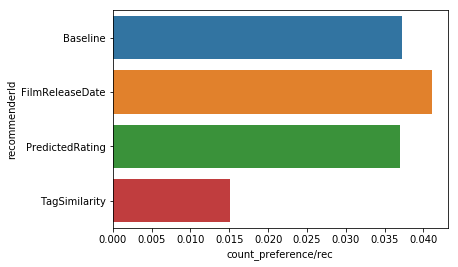

In [15]:
percent_rec_preference = (num_rec_respond/rec_played_liked_clean.groupby('recommenderId').count()['movieId']).reset_index()
percent_rec_preference.rename(columns={0:'count_preference/rec'},inplace=True)
percent_rec_preference
# Indeed, people tend to respond to 'TagSimilarity' the least, and 'FilmReleaseDate' the most. 

ax = sns.barplot(x="count_preference/rec", y="recommenderId", data=percent_rec_preference)


### Percentages of trailer liked among total trailer played for each algorithm. ###


In [5]:
total_played_likes = pd.read_csv('../Clean_Data/total_played_liked.csv', sep=',')
total_played_likes.loc[total_played_likes.recommenderId == 'ShuffledTopPicks', 'recommenderId'] = 'Baseline'

In [6]:
total_played_likes_clean = total_played_likes.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1)

# How many trailers, among all trailers played, are either liked or disliked, for each algorithm?
num_trailer_likes = total_played_likes_clean.groupby(['recommenderId','isLiked']).count().unstack()['userId']['TrailerLiked']
num_trailer_likes.head()

recommenderId
Baseline           418
FilmReleaseDate    600
PredictedRating    559
TagSimilarity      433
Name: TrailerLiked, dtype: int64

In [7]:
# How many are played, with each algorithm assignment?
num_trailers = total_played_likes_clean.groupby('recommenderId').count()['movieId']
num_trailers

recommenderId
Baseline           41154
FilmReleaseDate    41401
PredictedRating    41675
TagSimilarity      42729
Name: movieId, dtype: int64

In [8]:
# Calculate the percentage:
num_trailer_likes/num_trailers

recommenderId
Baseline           0.010157
FilmReleaseDate    0.014492
PredictedRating    0.013413
TagSimilarity      0.010134
dtype: float64